In [1]:
import pandas as pd


# Define file path
parent_folder = "/home/micha/Documents/run_experiments/Results/rep_739015/"
file_path = parent_folder + "BirthDeath.csv"

# Load the dataset
df = pd.read_csv(file_path, index_col=False)

df_death = df[df["Event_Type"] == "Death"]
df_birth = df[df["Event_Type"] == "Birth"]
# 1. KangarooRat - Birth events
df_kangaroo_birth = df[(df["Species"] == "KangarooRat") & (df["Event_Type"] == "Birth")]

# 2. KangarooRat - Death events
df_kangaroo_death = df[(df["Species"] == "KangarooRat") & (df["Event_Type"] == "Death")]

# 3. Rattlesnake - Birth events
df_rattlesnake_birth = df[(df["Species"] == "Rattlesnake") & (df["Event_Type"] == "Birth")]

# 4. Rattlesnake - Death events
df_rattlesnake_death = df[(df["Species"] == "Rattlesnake") & (df["Event_Type"] == "Death")]

# Display the number of rows in each new DataFrame
df_kangaroo_birth.shape, df_kangaroo_death.shape, df_rattlesnake_birth.shape, df_rattlesnake_death.shape


((2055, 15), (6773, 15), (35, 15), (309, 15))

In [2]:
df.head()

,Time_Step,Agent_id,Species,Age,Sex,Mass,Birth_Counter,Death_Counter,Alive,Event_Type,Cause_Of_Death,Litter_Size,Body_Temperature,ct_min,ct_max
0,1,7327,KangarooRat,15787,Male,67.087565,inf,52559,False,Death,predation,0,NaN,NaN,NaN
1,1,7498,KangarooRat,48901,Male,64.383440,inf,0,False,Death,old_age,0,NaN,NaN,NaN
2,1,5332,KangarooRat,14456,Female,66.212606,32281.0,0,False,Death,old_age,0,NaN,NaN,NaN
3,2,5510,KangarooRat,38759,Male,62.543317,inf,36350,False,Death,Random,0,NaN,NaN,NaN
4,3,632,KangarooRat,14277,Male,62.858281,inf,0,False,Death,old_age,0,NaN,NaN,NaN


In [4]:
print(f"Max time Step {max(df['Time_Step'])/(24*365)}")

Max time Step 5.999885844748858


In [4]:
grouped = df.groupby(['Species', 'Event_Type']).size().reset_index(name='Count')
grouped


,Species,Event_Type,Count
0,KangarooRat,Birth,2055
1,KangarooRat,Death,6773
2,Rattlesnake,Birth,35
3,Rattlesnake,Death,309


In [3]:
grouped = df_death.groupby(['Species', 'Event_Type','Cause_Of_Death']).size().reset_index(name='Count')
grouped


,Species,Event_Type,Cause_Of_Death,Count
0,KangarooRat,Death,Random,3536
1,KangarooRat,Death,old_age,1674
2,KangarooRat,Death,predation,1563
3,Rattlesnake,Death,old_age,23
4,Rattlesnake,Death,starved,286


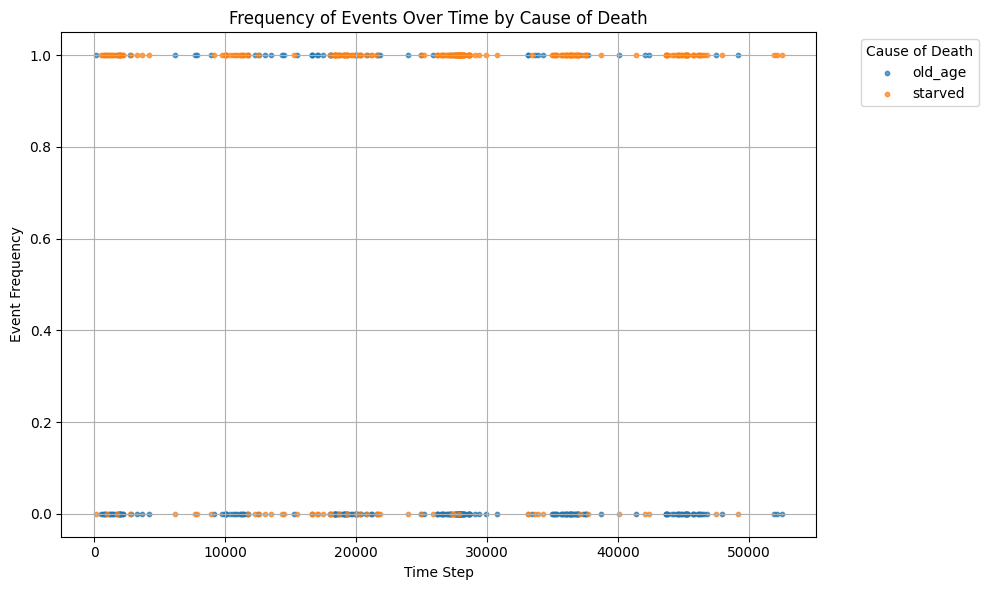

In [4]:
import matplotlib.pyplot as plt
event_counts = df[(df["Species"] == "Rattlesnake")].groupby(["Time_Step", "Cause_Of_Death"]).size().reset_index(name="Count")

# Compute total events per time step
total_events_per_step = event_counts.groupby("Time_Step")["Count"].sum().reset_index(name="Total_Events")

# Merge to compute frequency
event_counts = event_counts.merge(total_events_per_step, on="Time_Step")
event_counts["Frequency"] = event_counts["Count"] / event_counts["Total_Events"]

# Pivot for time series format
event_freq_ts = event_counts.pivot(index="Time_Step", columns="Cause_Of_Death", values="Frequency").fillna(0)

# Set up figure
plt.figure(figsize=(10, 6))

# Loop through each cause of death
for cause in event_freq_ts.columns:
    plt.scatter(event_freq_ts.index, event_freq_ts[cause], s=10, label=cause, alpha=0.7)

# Plot settings
plt.title("Frequency of Events Over Time by Cause of Death")
plt.xlabel("Time Step")
plt.ylabel("Event Frequency")
plt.legend(title="Cause of Death", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()



/tmp/ipykernel_24592/686869504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rattlesnake_death['Time_Bin'] = (df_rattlesnake_death['Time_Step'] // bin_size) * bin_size


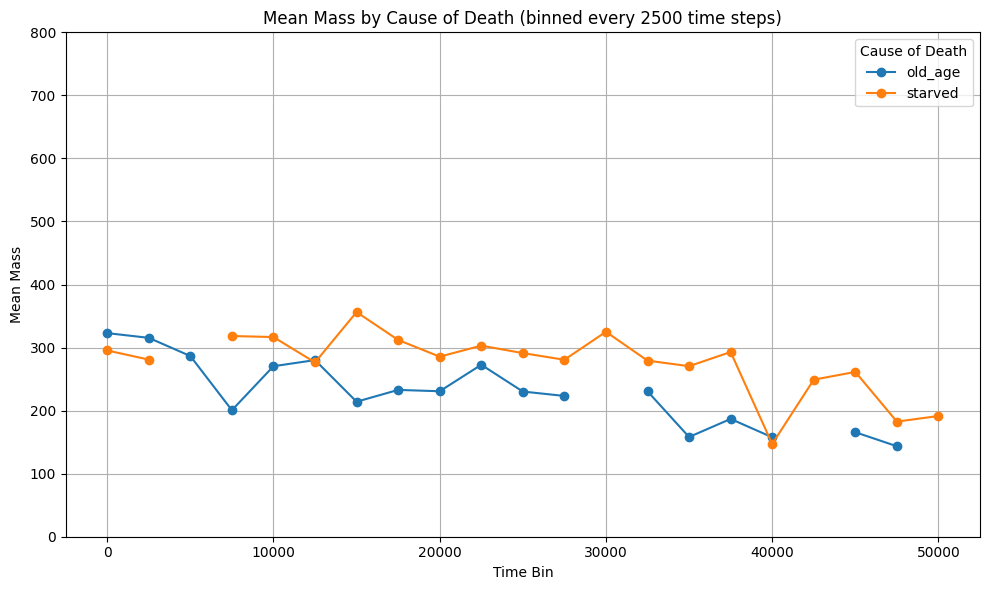

In [5]:
# Define bin size
bin_size = 2500

# Create binned time step
df_rattlesnake_death['Time_Bin'] = (df_rattlesnake_death['Time_Step'] // bin_size) * bin_size

# Group by binned time and cause of death
grouped = df_rattlesnake_death.groupby(['Time_Bin', 'Cause_Of_Death'])['Mass'].mean().reset_index()

# Pivot for plotting
pivoted = grouped.pivot(index='Time_Bin', columns='Cause_Of_Death', values='Mass')

# Plot
pivoted.plot(marker='o', figsize=(10, 6))
plt.title(f"Mean Mass by Cause of Death (binned every {bin_size} time steps)")
plt.ylabel("Mean Mass")
plt.xlabel("Time Bin")
plt.ylim(0, 800)
plt.grid(True)
plt.legend(title="Cause of Death")
plt.tight_layout()
plt.show()